In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
df=pd.read_csv("D:\\Kartik DataScience\Python\Assignment 5\\50_Startups.csv")

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.shape

(50, 5)

In [5]:

from sklearn import preprocessing
le=preprocessing.LabelEncoder()
le.fit(df['State'])
df['State']=le.transform(df['State'])
df.head()


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [6]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [7]:
df.describe()

,R&D Spend,Administration,Marketing Spend,State,Profit
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,1.000000,112012.639200
std,45902.256482,28017.802755,122290.310726,0.832993,40306.180338
min,0.000000,51283.140000,0.000000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,0.000000,90138.902500
50%,73051.080000,122699.795000,212716.240000,1.000000,107978.190000
75%,101602.800000,144842.180000,299469.085000,2.000000,139765.977500
max,165349.200000,182645.560000,471784.100000,2.000000,192261.830000


In [8]:
df.corr()

,R&D Spend,Administration,Marketing Spend,State,Profit
R&D Spend,1.000000,0.241955,0.724248,0.104685,0.972900
Administration,0.241955,1.000000,-0.032154,0.011847,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.077670,0.747766
State,0.104685,0.011847,0.077670,1.000000,0.101796
Profit,0.972900,0.200717,0.747766,0.101796,1.000000


In [9]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [10]:
df.drop(['R&D Spend'],axis=1,inplace=True)

In [11]:
df.head()

,Administration,Marketing Spend,State,Profit
0,136897.80,471784.10,2,192261.83
1,151377.59,443898.53,0,191792.06
2,101145.55,407934.54,1,191050.39
3,118671.85,383199.62,2,182901.99
4,91391.77,366168.42,1,166187.94


In [12]:
X=df.drop(['Profit'],axis=1)
y=df['Profit']

In [13]:
X

,Administration,Marketing Spend,State
0,136897.80,471784.10,2
1,151377.59,443898.53,0
2,101145.55,407934.54,1
3,118671.85,383199.62,2
4,91391.77,366168.42,1
5,99814.71,362861.36,2
6,147198.87,127716.82,0
7,145530.06,323876.68,1
8,148718.95,311613.29,2
9,108679.17,304981.62,0


In [14]:
y

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     14681.40
Name: Profit, dtype: float64

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=41)

In [16]:
X_train.shape

(40, 3)

In [17]:
X_test.shape

(10, 3)

In [25]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [26]:

ypred_test=lr.predict(X_test)

In [27]:
from sklearn.metrics import r2_score
score_test=r2_score(ypred_test,y_test)


In [28]:
score_test

0.2767572416031837

In [ ]:
# QQPLOT

In [29]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [32]:
residuals = y_test - ypred_test

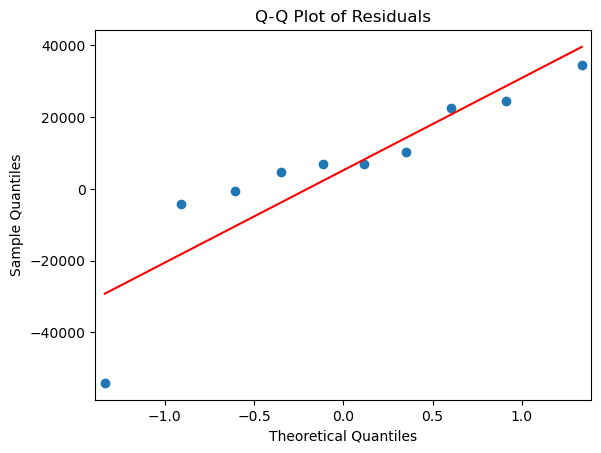

In [33]:
sm.qqplot(residuals, line ='r')
plt.title('Q-Q Plot of Residuals')
plt.show()

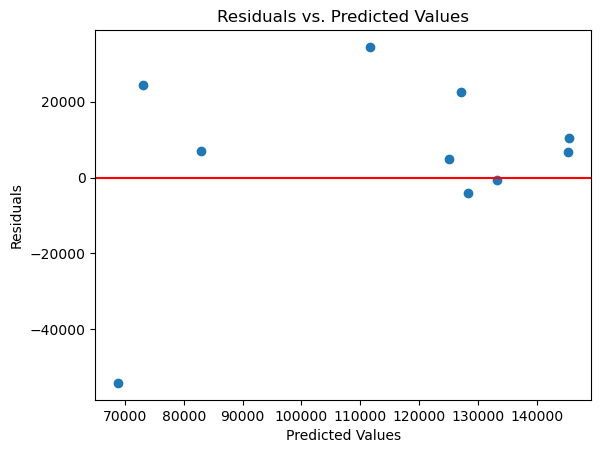

In [35]:
plt.scatter(ypred_test, residuals)
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

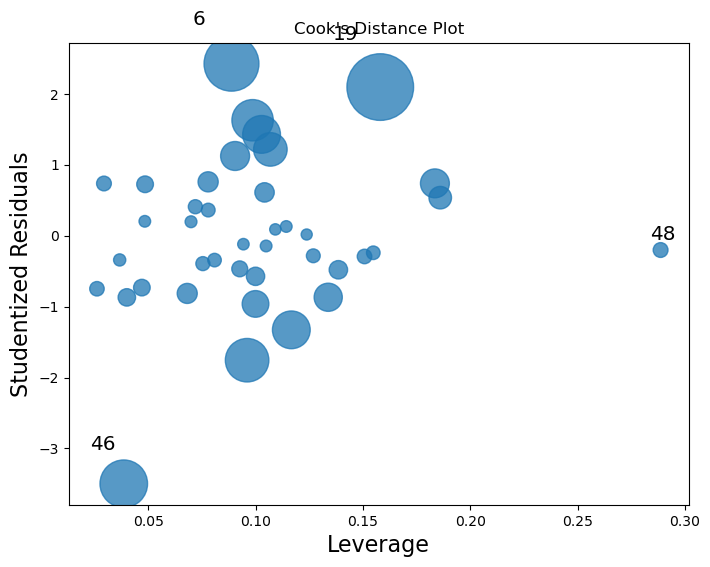

In [40]:
X_train_const = sm.add_constant(X_train)
model_ols = sm.OLS(y_train, X_train_const).fit()
influence = model_ols.get_influence()
fig, ax = plt.subplots(figsize=(8, 6))
sm.graphics.influence_plot(model_ols, ax=ax, criterion="cooks")
plt.title("Cook's Distance Plot")
plt.show()